# Part 4 - Sentiment Analysis

## Comments
In this part, we analyze the polarity of all the clean tweets that has been considered as ham. Then we group our tweet sentiments by companies in order to have way to measure the overall sentiment of each companies.

Then we save our processed data into two different files:
- *sentiment_by_companies.csv* : contained in **/7-data/6-Sentiment**
- *sentiment_by_tweets.csv* : contained in **/7-data/6-Sentiment**

These files will be used in part 5 - Portfolio Analysis to compute **the polarity of our portfolio.**

To have an quick overview of the words contained in our tweets we generated a world cloud of the most reccurent words in the tweets that we previously processed and classified.

<img src="./data/0-graphs/wordcloud.png"></img>

Now we perform the sentiment analysis

In [4]:
!pip3 install nltk

    100% |████████████████████████████████| 1.5MB 1.1MB/s 
  Running setup.py bdist_wheel for nltk ... error
  Complete output from command /home/bgir/venv/data-science/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-bp9uu4j2/nltk/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpjad4pmfjpip-wheel- --python-tag cp36:
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: -c --help [cmd1 cmd2 ...]
     or: -c --help-commands
     or: -c cmd --help
  
  error: invalid command 'bdist_wheel'
  
  ----------------------------------------
  Failed building wheel for nltk
  Running setup.py clean for nltk
Failed to build nltk
  Running setup.py install for nltk ... done


### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import brown
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Dataset
We import the clean non spam tweets. In order to analyze them.

In [3]:
# We import the tweets
df_tweets = pd.read_csv("./data/2-cleaned-tweets/twitter_data_clean_ham.csv")

# we eliminate the old index.
df_tweets = df_tweets.iloc[:,1:]
print("Number of tweets {0}".format(len(df_tweets['Processed Text'])))

# We set our sensivity to 0.1 which means that neutral will be in the interval (-0.1,0.1)
sensivity = 0.1

Number of tweets 101


# Tweet sentiment analysis
We now compute the polarity of each tweets depending on whether the tweet is positive or negative.
To do so we go through all the tweets contained in the dataset then compute their polarity.

In order to compute the polarity we have to base ourselves on a dictionnary that can tells us what is positive or negative.
NLTK provides a dictionnary called Vader which will give us enough accuracy for the scope of this project.

Finally, once we have computer the polarities we group our tweets and sentiment by companies since we are interested in the average sentiment of a company. And not individual tweets.

# VADER installation
First the user might need to install vader which is our sentiment analysis dictionnary, which will helps us in giving the polarity.

## First run
this will open a download user interface on which the user should select the all-nltk collections and download it, as depicted below:

In [ ]:
# once installed this step can be skipped.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


<img src="../6-Graphs/2-Project/howtoinstallvader.jpg">

## Then we run our sentiment analysis

In [4]:
# Lists initialization
score = []
classification_score = []

# We eliminate nan fields
df_tweets = df_tweets[pd.notnull(df_tweets['Processed Text'])]

# We eliminate doubles
df_tweets = df_tweets.drop_duplicates('Message ID')
df_tweets = df_tweets.drop_duplicates('Processed Text')

print("Processing tweets and Analyzing sentiment... (this might take a while)")
# For each 
for idx,row in df_tweets.iterrows():
    
    # We get the tweet into a temporary variable
    temp_tweet = row['Processed Text']
    
    # We initialize the tool that will help us to make the sentiment anaylsis
    sid = SentimentIntensityAnalyzer()
    
    # We call polarity
    ss = sid.polarity_scores(temp_tweet)
    
    # Assign the comounded polarity to a temporary variables for visibility purpose
    tempscore = ss['compound']
    
    # Add the score to the company tweet
    score.append(tempscore)
    
    # We test the score and regarding its results and a sensivity measure we assign neutral positive or negative.
    if tempscore > sensivity:
        classification_score.append("pos")
    elif tempscore < -sensivity:
        classification_score.append("neg")
    else:
        classification_score.append("neu")
        
# If everything went fine
print("Done")

# Finally add the lists to the dataframe
df_tweets['sentiment'] = score
df_tweets['classification_score'] = classification_score

Processing tweets and Analyzing sentiment... (this might take a while)
Done


## We check the results

In [5]:
df_tweets.sample(5)

,Company Name,Author Name,Text,Message ID,Published At,Retweet Count,Favorite Count,Processed Text,Predicted,sentiment,classification_score
72,SXP,Axmed Cabdi 🇸🇴,@Hubaal_ Waa aragtidiisa sxp lkn always runta ...,1169884160007081984,2019-09-06 08:04:53,0,0,Waa aragtidiisa sxp lkn always runta waa muh...,ham,0.0,neu
70,NEXO,Rob Wijnhoven,RT @rasto1973: $NEXO by @NexoFinance has been ...,1169890804342521856,2019-09-06 08:31:17,1,0,$NEXO by has been re-listed on,ham,0.0,neu
51,MCO,🐣ぴよまる。,RT @mochi19770128: 今クラン作るためにサブ垢育成してるんで\n会ったら本物...,1169897047593377794,2019-09-06 08:56:06,4,0,今クラン作るためにサブ垢育成してるんで 会ったら本物だと思ってください！,ham,0.0,neu
43,MCO,🍼みごみご🐣浪速のしかめっ面🐾,@shirokuma_MCO すいみんなかま,1169897456433164292,2019-09-06 08:57:43,0,0,すいみんなかま,ham,0.0,neu
42,MCO,株式会社ミヨシ a.k.a. MCO【公式】,@cmbar_inc @hapinavi いつか…いつか必ずや…！（涙でモニターがにじむ…😭😭😭）,1169897517032456193,2019-09-06 08:57:58,0,0,いつか…いつか必ずや…！（涙でモニターがにじむ…😭😭😭）,ham,0.0,neu


In [6]:
df_tweets.describe()

,Message ID,Retweet Count,Favorite Count,sentiment
count,1.010000e+02,101.000000,101.000000,101.000000
mean,1.169491e+18,41.861386,0.742574,0.061783
std,7.351401e+14,333.382994,2.579354,0.223977
min,1.166493e+18,0.000000,0.000000,-0.735100
25%,1.169392e+18,0.000000,0.000000,0.000000
50%,1.169877e+18,0.000000,0.000000,0.000000
75%,1.169898e+18,1.000000,1.000000,0.000000
max,1.169899e+18,3326.000000,22.000000,0.718400


## Group By Company
We now need to groupby companies because we are interested in an overall score of the company.
We compute the mean of the overal sentiment by company. Which means that if we have 5 tweets for a company, we compute the mean of these 5 tweets.

One problem that can be underlined is that each tweet does have the same weight. One solution could be to compute a credibility ratio that would plays a role in computing the weight.
However, for the scope of the course we are keeping it to the mean.

In [7]:
# We groupy by company name and do the mean. The only relevant variable here is the mean of the sentiment
sentiment_by_companies = df_tweets.groupby('Company Name').mean()
classification_score_by_companies = []

# We test the score and regarding its results and a sensivity measure we assign neutral positive or negative for each companies.
for idx, row in sentiment_by_companies.iterrows():
    if row['sentiment'] > sensivity:
        classification_score_by_companies.append("pos")
    elif row['sentiment'] < -sensivity:
        classification_score_by_companies.append("neg")
    else:
        classification_score_by_companies.append("neu")

# We assign to the dataframe
sentiment_by_companies['classification'] = classification_score_by_companies

We check whether our categorical sentiment ha correctly been applied

In [8]:
sentiment_by_companies.sample(5)

,Message ID,Retweet Count,Favorite Count,sentiment,classification
Company Name,,,,,
MCO,1.169898e+18,0.173913,0.347826,0.031235,neu
DROP,1.168803e+18,0.638889,1.444444,0.087000,neu
CHSB,1.169695e+18,9.666667,0.166667,0.159000,pos
NEXO,1.169893e+18,0.250000,0.250000,0.179600,pos
EDO,1.169898e+18,3.153846,0.000000,0.039192,neu


### Save

In [11]:
# We save our datasets into csv files
df_tweets.to_csv("./data/3-sentiment/sentiment_by_tweets.csv")
sentiment_by_companies.to_csv("./data/3-sentiment/sentiment_by_companies.csv")

/home/bgir/venv/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


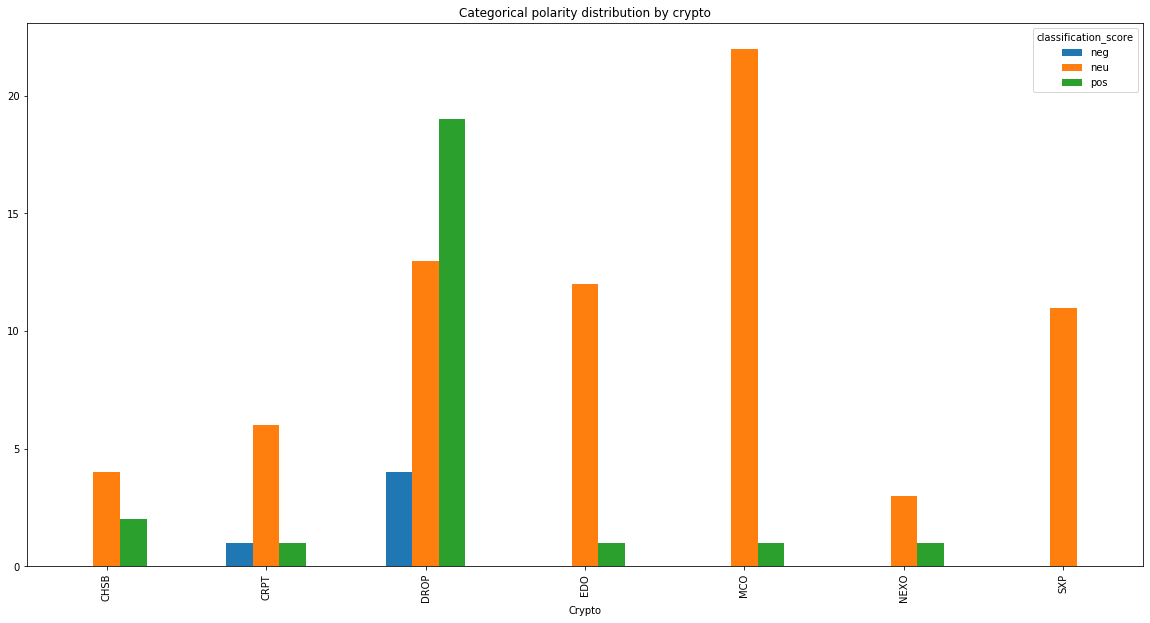

In [12]:
# We plot to have so visual representation of what's going on.
ax = df_tweets.groupby(['Company Name', 'classification_score']).size().unstack().plot(kind='bar',figsize=(20, 10))
fig = ax.get_figure()
ax.set_title("Categorical polarity distribution by crypto")
ax.set_xlabel("Crypto")
fig.savefig('./data/0-graphs/categorical polarity distribution by crypto.png')
fig.show()

/home/bgir/venv/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


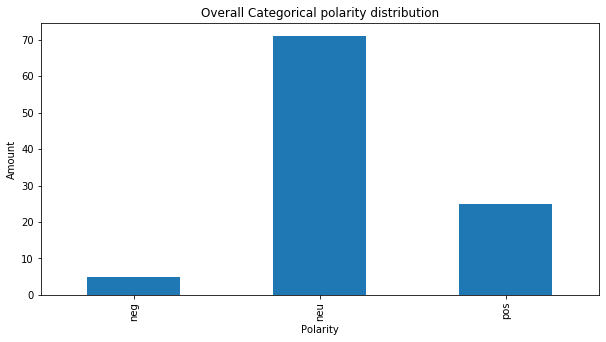

In [16]:
# Here we can see how our algorithm classified the tweets.
ax = df_tweets.groupby('classification_score').size().plot(kind='bar',figsize=(10, 5))  # s is an instance of Series
fig = ax.get_figure()
ax.set_title("Overall Categorical polarity distribution")
ax.set_xlabel("Polarity")
ax.set_ylabel("Amount")
fig.savefig('./data/0-graphs/overall categorical polarity distribution.png')
fig.show()

# Part 4 - Conclusion
To conclude part 4, we can draw that our algorithm succeeded in computing the polarity of our tweets. We also can see that our categorigal distribution has a mean of "neutral", which might be due to the fact that often, financial information is only informative. 

Furthermore, we also have to take into account that our sentiment might be biased because of subjectiveness of some tweets.
However, this **lack of objectiveness** can be corrected with a certain amount of data if we take into account that not all tweets are subjective.

Another possible outcome of our algorithm could be the lack of precision/efficiency in the Vader dictionnary. We could also improve Vader in order to have a dictionnary that better **cover the needs of financial tweets analysis.**

Another solution could be to increase the sensivity of our classifier, for example reduce it to 0.05 or lower in order to catch less neutrals and more negative/positive.

# Now the user may go to Part - 5 Portfolio Analysis
File *portfolio_analysis.ipynb* in folder **5-Portfolio**